## ME 7160: Nonlinear Dynamics and Vibration Homework 2

1. Construct the phase portrait for Problem 2.1g of Nayfeh and Mook (1979) and discuss. The constants $a$ and $\lambda$ have ranges that cause various behaviors. *Discover them all*. 
Construct the phase portrait by:

    - Determining the potential function (by integrating $F(u)$) and sketching it as a contour plot for the various scenarios (hint: 3 scenarios). See notes at the end of Chapter 1. 
    - Numerically. 

    $$\ddot{u}+u-\frac{\lambda}{a-u}=0$$
    
2. Construct the phase portrait and discuss the following. 

    A) $$\ddot{x}+x+x^3=0$$
    B) $$\ddot{x}+x-x^3=0$$
    C) $$\ddot{x}-x+x^3=0$$
    D) $$\ddot{x}-x-x^3=0$$
    E) $$\ddot{x}+x^3=0$$

2. Problem 1.1 in the text.
Determine when the following set of equations are dissipative, and when they are conservative;
    $$\dot{x} = \sigma(y-x)$$
    $$\dot{y} = \rho x - y - x z$$
    $$\dot{z} = -\beta z + x y$$

3. Problem 1.2 in the text.
Determine when the following set of equations are dissipative, and when they are conservative;  
    $$\dot{x} = -(y+z)$$
    $$\dot{y} = x + a y$$
    $$\dot{z} = b + (x - c) z$$
    
4. Problem 1.3 in the text. 
Determine when the following map is dissipative;
    $$x_{n+1} = a_{11}x_n+a_{12}y_n$$
    $$y_{n+1} = a_{21}x_n+a_{22}y_n$$
    


### Problem 2A
The system is stable with an equilibrium position at (0,0).

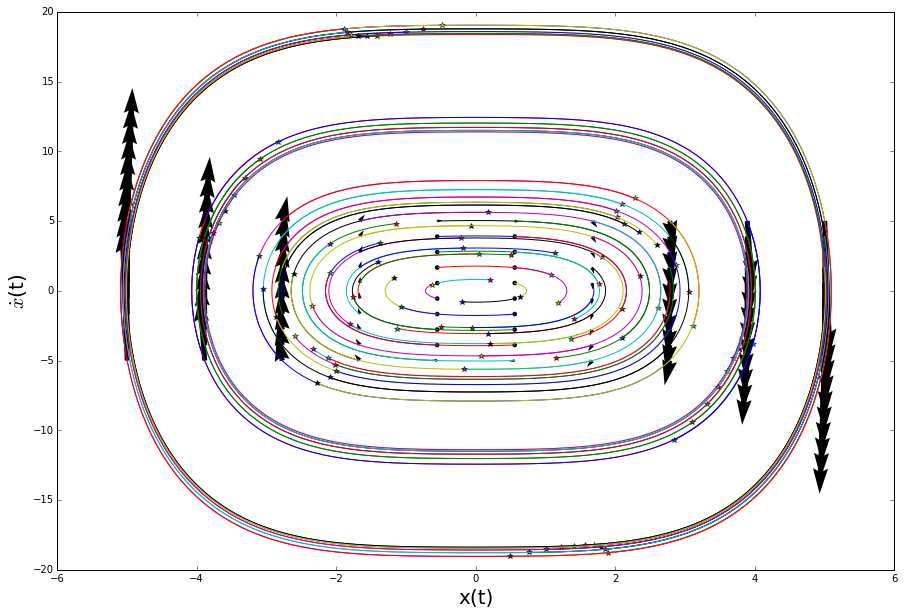

In [1]:
%matplotlib inline
import pylab as pl
import scipy.integrate as sp
import numpy as np
import cmath as cmath
from matplotlib.legend_handler import HandlerLine2D

def RHS(x = np.asarray([1,2])):
    Xdot1 = x[1, :]
    Xdot2 = -x[0, :] - x[0, :]**3
    return Xdot1, Xdot2

# plotting information
plus = 5 
minus = -5
numx = 10
numv = 10
x1all = np.linspace(minus, plus, numx)
x2all = np.linspace(minus, plus, numv)
x1, x2 = np.meshgrid(x1all, x2all)
x1.shape = (numx*numv,1)
x2.shape = (numx*numv,1)
x = np.asarray([x1,x2])

# Evaluating the function
Xdot1, Xdot2 = RHS(x = x)

pl.figure(figsize=(15,10))
# Plotting some solutions
def solve_hw2(max_time=1.0,x0 = np.array([[-1, -.9 , -0.9, -1, -1]]).T, v0 = np.array([[1, 1, .9, 0.9, 1]]).T, plotnow = 1):
    def hw2_deriv(x1_x2, t):
        """Compute the time-derivative of a SDOF system."""
        x1, x2 = x1_x2
        return [x2, -x1-x1**3]
    x0 = np.concatenate((x0, v0), axis = 1)
    N = x0.shape[0]
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([sp.odeint(hw2_deriv, x0i, t)
                      for x0i in x0])
    if plotnow == 1:
        #fig = plt.figure()
        #plt.axis((-1.4,1.4,-1.2,1.2))
        for i in range(N):
            x, v = x_t[i,:,:].T
            pl.plot(x, v,'-')
            #Let's plot '*' at the end of each trajectory.
            pl.plot(x[-1],v[-1],'*')
        pl.grid('on')
    # Just in case we want to pull and plot.
    return t, x_t

pl.quiver(x1, x2, Xdot1, Xdot2)
_,_ = solve_hw2(max_time=1, x0 = x1, v0 = x2)
pl.xlabel('x(t)', fontsize=20)
pl.ylabel('$\dot{x}$(t)', fontsize=20)
pl.grid()
pl.show()

### Problem 2B
## Asymptotically stable, stable near the equilibrium solution (0,0) , unstable away from the equilibrium point.

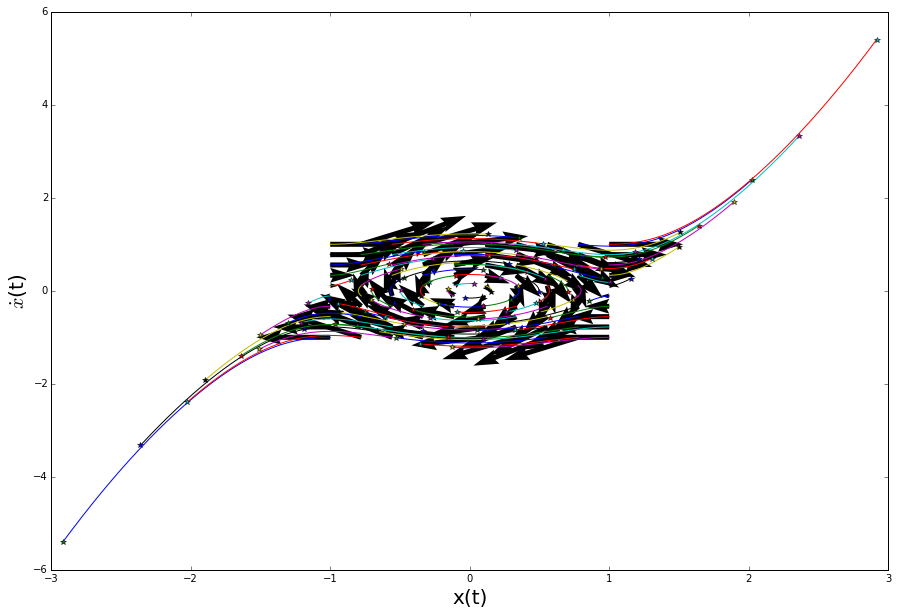

In [2]:
def RHS(x = np.asarray([1,2])):
    Xdot1 = x[1, :]
    Xdot2 = -x[0, :] + x[0, :]**3
    return Xdot1, Xdot2

# plotting information
plus = 1
minus = -1
numx = 10
numv = 10
x1all = np.linspace(minus, plus, numx)
x2all = np.linspace(minus, plus, numv)
x1, x2 = np.meshgrid(x1all, x2all)
x1.shape = (numx*numv,1)
x2.shape = (numx*numv,1)
x = np.asarray([x1,x2])

# Evaluating the function
Xdot1, Xdot2 = RHS(x = x)

pl.figure(figsize=(15,10))
# Plotting some solutions
def solve_hw2(max_time=1.0,x0 = np.array([[-1, -.9 , -0.9, -1, -1]]).T, v0 = np.array([[1, 1, .9, 0.9, 1]]).T, plotnow = 1):
    def hw2_deriv(x1_x2, t):
        """Compute the time-derivative of a SDOF system."""
        x1, x2 = x1_x2
        return [x2, -x1+x1**3]
    x0 = np.concatenate((x0, v0), axis = 1)
    N = x0.shape[0]
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([sp.odeint(hw2_deriv, x0i, t)
                      for x0i in x0])
    if plotnow == 1:
        #fig = plt.figure()
        #plt.axis((-1.4,1.4,-1.2,1.2))
        for i in range(N):
            x, v = x_t[i,:,:].T
            pl.plot(x, v,'-')
            #Let's plot '*' at the end of each trajectory.
            pl.plot(x[-1],v[-1],'*')
        pl.grid('on')
    # Just in case we want to pull and plot.
    return t, x_t

pl.quiver(x1, x2, Xdot1, Xdot2)
_,_ = solve_hw2(max_time=1, x0 = x1, v0 = x2)
pl.xlabel('x(t)', fontsize=20)
pl.ylabel('$\dot{x}$(t)', fontsize=20)
pl.grid()
pl.show()

### Problem 2C
## Stable system with two equilibrium solutions.

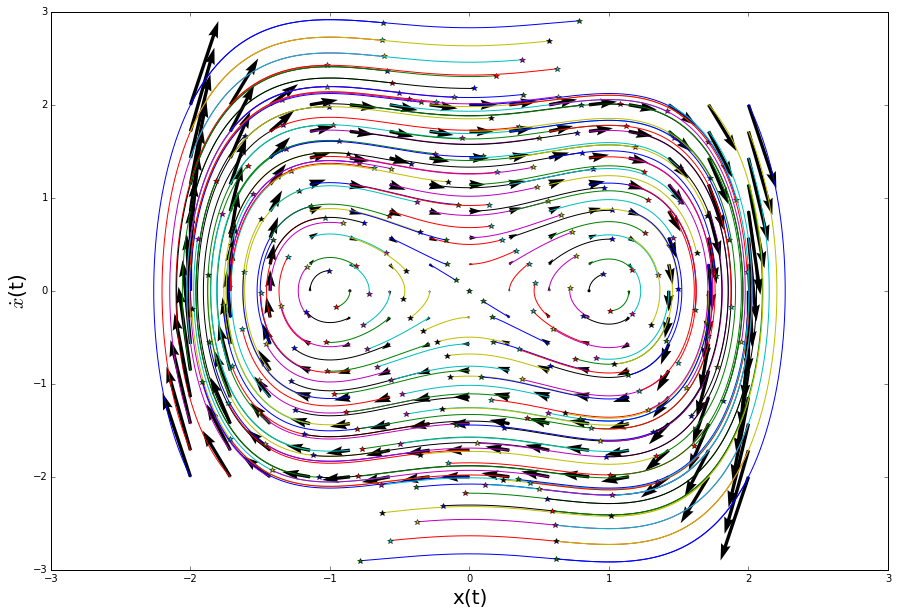

In [3]:
def RHS(x = np.asarray([1,2])):
    Xdot1 = x[1, :]
    Xdot2 = x[0, :] - x[0, :]**3
    return Xdot1, Xdot2

# plotting information
plus = 2
minus = -2
numx = 15
numv = 15
x1all = np.linspace(minus, plus, numx)
x2all = np.linspace(minus, plus, numv)
x1, x2 = np.meshgrid(x1all, x2all)
x1.shape = (numx*numv,1)
x2.shape = (numx*numv,1)
x = np.asarray([x1,x2])

# Evaluating the function
Xdot1, Xdot2 = RHS(x = x)

pl.figure(figsize=(15,10))
# Plotting some solutions
def solve_hw2(max_time=1.0,x0 = np.array([[-1, -.9 , -0.9, -1, -1]]).T, v0 = np.array([[1, 1, .9, 0.9, 1]]).T, plotnow = 1):
    def hw2_deriv(x1_x2, t):
        """Compute the time-derivative of a SDOF system."""
        x1, x2 = x1_x2
        return [x2, x1-x1**3]
    x0 = np.concatenate((x0, v0), axis = 1)
    N = x0.shape[0]
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([sp.odeint(hw2_deriv, x0i, t)
                      for x0i in x0])
    if plotnow == 1:
        #fig = plt.figure()
        #plt.axis((-1.4,1.4,-1.2,1.2))
        for i in range(N):
            x, v = x_t[i,:,:].T
            pl.plot(x, v,'-')
            #Let's plot '*' at the end of each trajectory.
            pl.plot(x[-1],v[-1],'*')
        pl.grid('on')
    # Just in case we want to pull and plot.
    return t, x_t

pl.quiver(x1, x2, Xdot1, Xdot2)
_,_ = solve_hw2(max_time=1, x0 = x1, v0 = x2)
pl.xlabel('x(t)', fontsize=20)
pl.ylabel('$\dot{x}$(t)', fontsize=20)
pl.grid()
pl.show()

### Problem 2D
## Unstable system with a single node equilibrium solution at (0,0). This point is only theoretical and in practice is basically nonexistent.

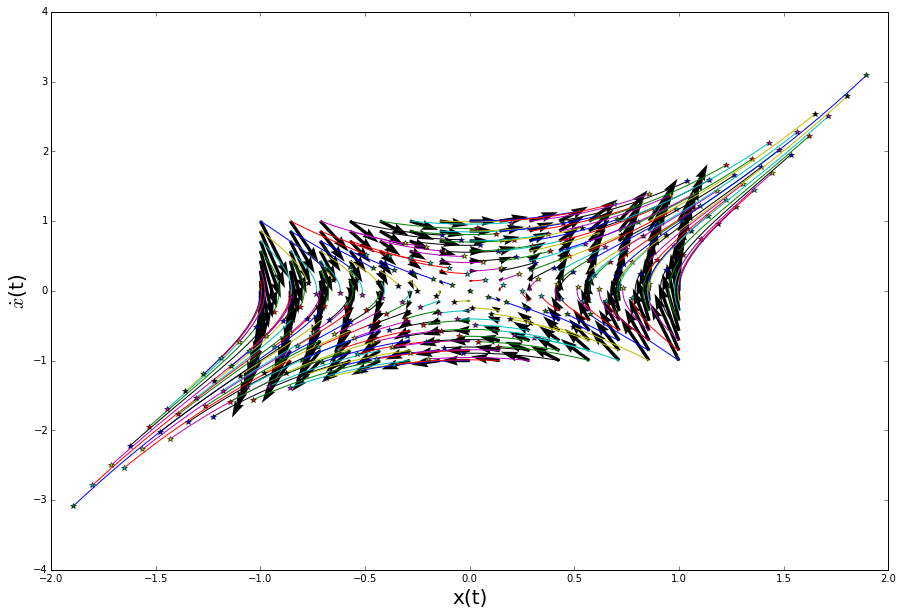

In [4]:
def RHS(x = np.asarray([1,2])):
    Xdot1 = x[1, :]
    Xdot2 = x[0, :] + x[0, :]**3
    return Xdot1, Xdot2

# Inputs (CHANGE ME)
plus = 1
minus = -1
numx = 15
numv = 15
time = 0.5

# plotting information
x1all = np.linspace(minus, plus, numx)
x2all = np.linspace(minus, plus, numv)
x1, x2 = np.meshgrid(x1all, x2all)
x1.shape = (numx*numv,1)
x2.shape = (numx*numv,1)
x = np.asarray([x1,x2])

# Evaluating the function
Xdot1, Xdot2 = RHS(x = x)

pl.figure(figsize=(15,10))
# Plotting some solutions
def solve_hw2(max_time=0.5,x0 = np.array([[-1, -.9 , -0.9, -1, -1]]).T, v0 = np.array([[1, 1, .9, 0.9, 1]]).T, plotnow = 1):
    def hw2_deriv(x1_x2, t):
        """Compute the time-derivative of a SDOF system."""
        x1, x2 = x1_x2
        return [x2, x1+x1**3]
    x0 = np.concatenate((x0, v0), axis = 1)
    N = x0.shape[0]
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([sp.odeint(hw2_deriv, x0i, t)
                      for x0i in x0])
    if plotnow == 1:
        #fig = plt.figure()
        #plt.axis((-1.4,1.4,-1.2,1.2))
        for i in range(N):
            x, v = x_t[i,:,:].T
            pl.plot(x, v,'-')
            #Let's plot '*' at the end of each trajectory.
            pl.plot(x[-1],v[-1],'*')
        pl.grid('on')
    # Just in case we want to pull and plot.
    return t, x_t

pl.quiver(x1, x2, Xdot1, Xdot2)
_,_ = solve_hw2(max_time=time, x0 = x1, v0 = x2)
pl.xlabel('x(t)', fontsize=20)
pl.ylabel('$\dot{x}$(t)', fontsize=20)
pl.grid()
pl.show()

### Problem 2E
## Stable system

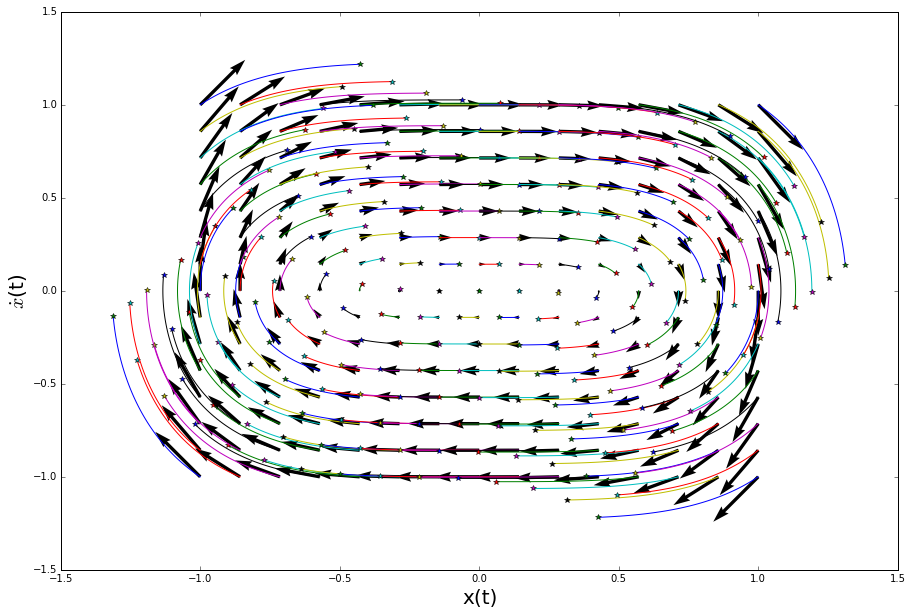

In [5]:
def RHS(x = np.asarray([1,2])):
    Xdot1 = x[1, :]
    Xdot2 =  -x[0, :]**3
    return Xdot1, Xdot2

# Inputs (CHANGE ME)
plus = 1
minus = -1
numx = 15
numv = 15
time = 0.5

# plotting information
x1all = np.linspace(minus, plus, numx)
x2all = np.linspace(minus, plus, numv)
x1, x2 = np.meshgrid(x1all, x2all)
x1.shape = (numx*numv,1)
x2.shape = (numx*numv,1)
x = np.asarray([x1,x2])

# Evaluating the function
Xdot1, Xdot2 = RHS(x = x)

pl.figure(figsize=(15,10))
# Plotting some solutions
def solve_hw2(max_time=0.5,x0 = np.array([[-1, -.9 , -0.9, -1, -1]]).T, v0 = np.array([[1, 1, .9, 0.9, 1]]).T, plotnow = 1):
    def hw2_deriv(x1_x2, t):
        """Compute the time-derivative of a SDOF system."""
        x1, x2 = x1_x2
        return [x2, -x1**3]
    x0 = np.concatenate((x0, v0), axis = 1)
    N = x0.shape[0]
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([sp.odeint(hw2_deriv, x0i, t)
                      for x0i in x0])
    if plotnow == 1:
        #fig = plt.figure()
        #plt.axis((-1.4,1.4,-1.2,1.2))
        for i in range(N):
            x, v = x_t[i,:,:].T
            pl.plot(x, v,'-')
            #Let's plot '*' at the end of each trajectory.
            pl.plot(x[-1],v[-1],'*')
        pl.grid('on')
    # Just in case we want to pull and plot.
    return t, x_t

pl.quiver(x1, x2, Xdot1, Xdot2)
_,_ = solve_hw2(max_time=time, x0 = x1, v0 = x2)
pl.xlabel('x(t)', fontsize=20)
pl.ylabel('$\dot{x}$(t)', fontsize=20)
pl.grid()
pl.show()

## Problem 3

Considering the system of equations 
    $$\dot{x} = \sigma(y-x)$$
    $$\dot{y} = \rho x - y - x z$$
    $$\dot{z} = -\beta z + x y$$

The divergence of the vector field is:
    $$ \frac{\partial \dot{x}}{\partial x} + \frac{\partial \dot{y}}{\partial y} + \frac{\partial \dot{z}}{\partial z} = -\sigma - 1 - \beta $$

The system is conservative when:
    $$ \sigma + \beta = -1$$
    
The system is dissipative when:
    $$ \sigma + \beta < -1$$

$\rho$ does not effect whether the system is conserative or dissipative.


## Problem 4

Considering the system of equations 
    $$\dot{x} = -(y+z)$$
    $$\dot{y} = x + a y$$
    $$\dot{z} = b + (x - c) z$$

The divergence of the vector field is:
    $$ \frac{\partial \dot{x}}{\partial x} + \frac{\partial \dot{y}}{\partial y} + \frac{\partial \dot{z}}{\partial z} = a+x-c $$

The system is conservative when:
    $$ c - a = x$$
    
The system is dissipative when:
    $$ a-c < -x$$

$b$ does not effect whether the system is conserative or dissipative.



## Problem 5

Considering the map
    $$x_{n+1} = a_{11}x_n+a_{12}y_n$$
    $$y_{n+1} = a_{21}x_n+a_{22}y_n$$
    

The map is dissipative at $x_{k}$ = $x_{0}$ if:
    $$ |det D_{x_{k}} F| < 1 \text{ at } x_{k} = x_{0} $$
$$
|det D_{x_{k}} F| = 
\begin{vmatrix}
a_{11}&a_{12}\\
a_{21}&a_{22}
\end{vmatrix} = a_{11} \text{ x } a_{22} - a_{12} \text{ x } a_{21} $$ 

Therefore, this map is dissipative if 
    $$ a_{11} \text{ x } a_{22} - a_{12} \text{ x } a_{21}  < 1$$
